In [78]:
import pandas as pd
import numpy as np

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

In [79]:
class Datasets:
    
    def load_dataset(dataset_name):
        return pd.read_csv(f'../../datasets/anomaly_detection/{dataset_name}.csv')

class ATSFDataset:
    
    _data_df = None
    
    class Columns:
        TIMESTAMP = 'timestamp'
        VALUE_F = 'value_f'
        VALUE_C = 'value_c'
        
    
    def load(self):
        
        self._data_df = Datasets.load_dataset('ambient_temperature_system_failure')
        self._data_df[ATSFDataset.Columns.TIMESTAMP] = pd.to_datetime(self._data_df[ATSFDataset.Columns.TIMESTAMP])
        self._data_df.rename(columns={ 'value' : ATSFDataset.Columns.VALUE_F }, inplace=True, errors='raise')
        self._data_df[ATSFDataset.Columns.VALUE_C]= (self._data_df[ATSFDataset.Columns.VALUE_F]- 32) * 5 / 9
        
        return self
    
    def get_df(self):
        return self._data_df
    
    def plot(self):
        n_rows = 1
        n_cols = 1
        
        fig, axs = plt.subplots(n_rows, n_cols)
        
        axis_1 = axs
        axis_1.set_title("Temperature By Date Time")
        axis_1.set_xlabel("Date And Time")
        axis_1.set_ylabel("Temp. C")
        
        axis_1.tick_params(axis='x', labelcolor='red', labelrotation=90, labelsize=10)
        axis_1.tick_params(axis='y', labelcolor='blue', labelsize=10)
        
        x = self._data_df[ATSFDataset.Columns.TIMESTAMP]
        y = self._data_df[ATSFDataset.Columns.VALUE_C]
        axis_1.plot(x, y)

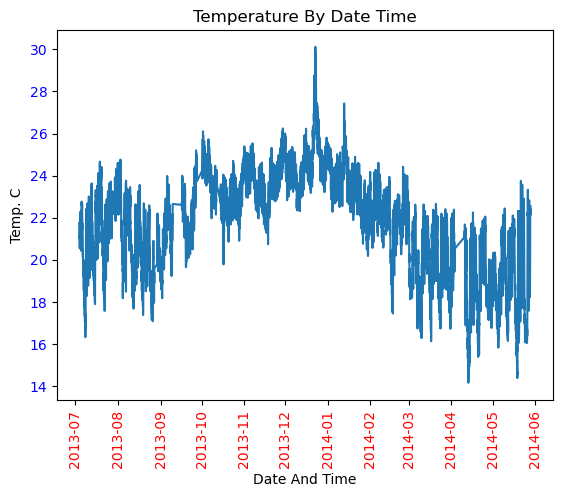

In [80]:
test = ATSFDataset().load()
test.plot()